# Project: Investigate what leads to no-show at medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report aims to investigate which factors are important to predict if a patient will or won't show at a medical appointment. We will analyze factors such as the enrollment in the scholarship program called "Bolsa Famíla", and some others like the alcoholism issue, gender and age. In this notebook, every step used to treat and analyze the data will be promptly detailed.

We will start by importing the necessary packages to perform the analysis. They're:

* pandas
* numpy
* matplotlib
* seaborn

In [1]:
# imports the necessary packages to perform our analysis (pandas, numpy, matplotlib and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

To avoid unnecessary repetition of code, we will implement a function to retrieve the unique values from a column. Let's call it 'get_unique_values'.

In [48]:
# get the unique values from a column
def get_unique_values(columnName):
    unVal = set()
    for appointment in appointments:
        unVal.add(appointment[columnName])
    return unVal

<a id='wrangling'></a>
## Data Wrangling

### General Properties

We will now load the .csv file containing the no-show records and read the first ten lines to evaluate the data.

In [3]:
# reads the csv file and stores the data on the variable 'df'
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
# prints the first ten lines of the dataframe
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


We have some interesting factors: the enrollment in the scholarship program ("Bolsa Família"), if the patient has diabetes, if the patient is an alcoholic, has some form of handcap, and if a text message was received by the patient containing information about the medical appointment.

Now, we'll perform some initial tasks to evaluate the data types, number of appointment records and so on.

In [4]:
# returns column information (number of entries and data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Looks like we have a pretty clean dataset, with 110527 records and 14 columns. The columns which are used to describe if the patient has some medical condition (diabetes, hipertension, alcoholism) are of int types, which can make the operations and graph plots much easier.

In [5]:
# returns the values from dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


By looking at the mean row we can extract some interesting information. The average age of the patients is 37. Approximately 9% of them are enrolled in the "Bolsa Família" scholarship program. 19% have hipertension. 7% of the patients have diabetes. 3% are alcoholics. 2% have some kind of handcapping. And for 32% of the appointments, a text message was received about the appointment.

We will now look at the number of the medical appointments which the patient didn't showed up.

Before that, it looks like the column naming isn't helping us to obtain the information we need. We will rename the column names, so that each one of them is in lowercase, and remove the '-' in the No-show column label to replace with a "_".

In [6]:
# rename every column name to lowercase letters, and replace the "-" with a "_" in no-show column
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
# print the first ten lines to save the changes
df.head(10)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


That makes our work here much easier. Now, let's see how many appointments ended up with a no-show.

In [47]:
# return the unique value counts from the "no_show" column 
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

From the dataset we can see that 22319 patients didn't showed up to their appointments, which is a large number.

### Cleaning up the dataset

Now, we will perform some cleaning on this dataset, dropping some unnecessary columns.

In [8]:
# print the first ten lines to save changes
df.head(10)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


By looking up at this dataset, we can see that some columns like the patientid, appointmentid, scheduledday and appointmentday aren't that helpful to us in order to obtain some answers. So, we can drop them off from this dataset.

In [9]:
# drop the following columns from our dataframe, since they're not relevant for our analysis
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1, inplace=True)

We also need to perform some cleaning on the 'age' column, since some negative values were found. Let's take a look at which values are negative, first.

In [10]:
# search for negative values for the 'age' column
df.query("age < 0")

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


We have one line which age is negative. So, let's drop it by using its index.

In [11]:
# drop the line containing the negative age value
df.drop(df.index[99832], inplace=True)
# print the first five lines and save changes
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's take a look again at the dataframe values.

In [12]:
# returns the values from dataframe
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


By the record, we can see that the maximum age value is 115. We can leave this as it is, because the life expectancy in Brazil increased up over the last years. Let's see how these variables relate with one another, using a correlation matrix.

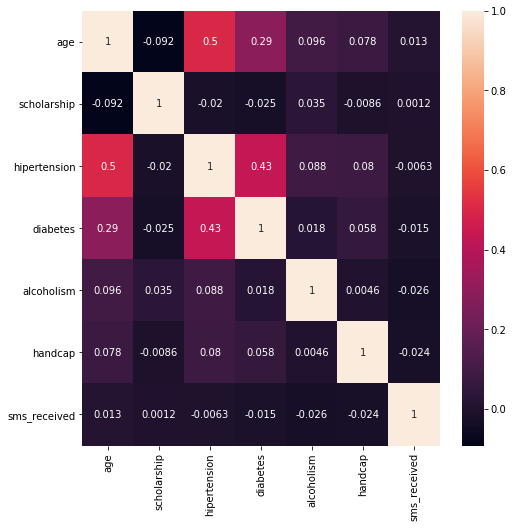

In [44]:
# creates a correlation matrix from our dataframe
corr = df.corr()
# sets the size of each cell to 8 x 8
f, ax = plt.subplots(figsize=(8, 8))
# add the correlation matrix to a heatmap, and then generates it
sns.heatmap(corr, annot=True, ax=ax);

And now we have a clean dataset, which allows us to ask some relevant questions.

In [14]:
# print the first ten lines of our dataframe
df.head(10)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Which factors are more relevant to predict if a patient won't show up to their medical appointment?

For the investigation part, we will only work with the people which didn't showed up to their appointments. Let's group them in a new dataframe, called 'df_ns'.

In [15]:
# perform a query only containing appointments which the patients didn't showed up, and saves data on a new dataframe
df_ns = df.query('no_show == "Yes"')

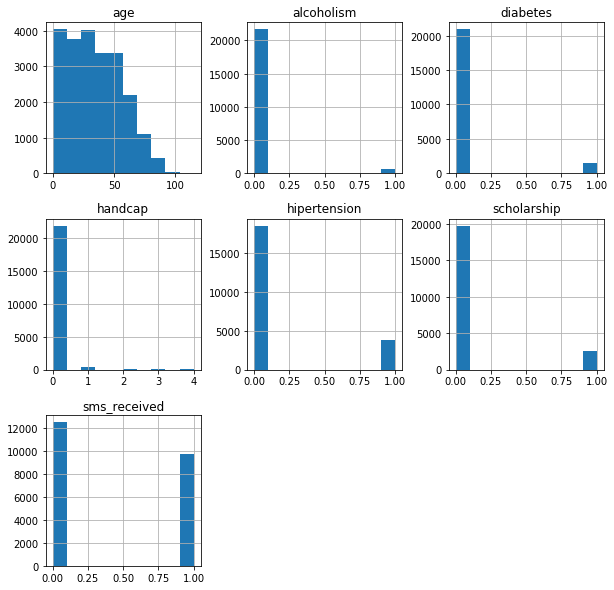

In [16]:
# generate a histogram from each column on our dataframe
df_ns.hist(figsize=(10,10));

From this new dataframe, we can look some interesting facts. From the age histogram, the values are more skewed to the right, which shows that younger patients are more likely to skip their appointments. The patients that suffer from hipertension skipped more than any other patients with health conditions. Curiously, a large number of patients that received the SMS message also skipped their appointments. Let's start our analysis.

As we can see, there are 22319 patients which didn't showed up to their appointments.

In [17]:
# returns the number of rows and columns on our dataframe
df_ns.shape

(22319, 10)

Let's see how many men and women didn't showed up to their appointments.

In [18]:
# return the number of male and female patients that didn't showed up their appointments
df_ns.gender.value_counts()

F    14594
M     7725
Name: gender, dtype: int64

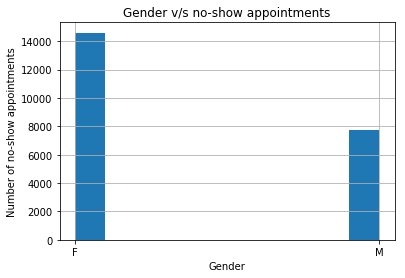

In [19]:
# plot a histogram based on the 'gender' column
df_ns.gender.hist();
# plotting the x label
plt.xlabel('Gender');
# plotting the y label
plt.ylabel('Number of no-show appointments');
# plotting the title of our histogram
plt.title('Gender v/s no-show appointments');

As we can see, more women didn't showed up to their appointments. Let's create two more dataframes that contain male and female patients. Next, let's look at the histograms for each gender.

In [20]:
# creates a new dataframe only with the male patients
df_nsm = df_ns.query('gender == "M"')
# creates a new dataframe only with the female patients
df_nsf = df_ns.query('gender == "F"')

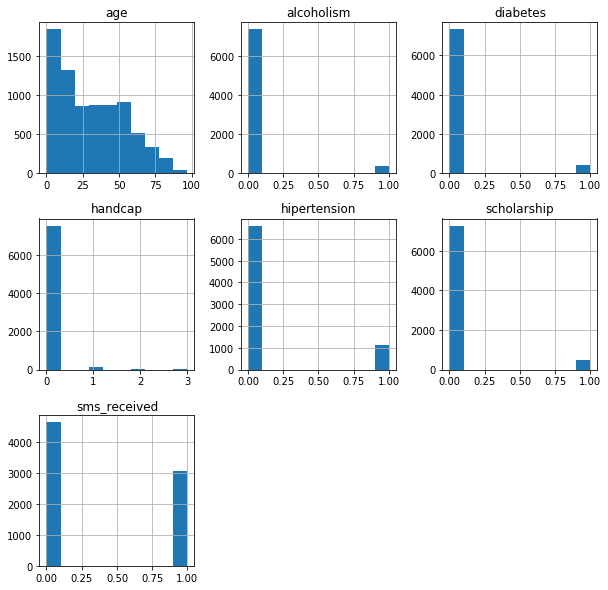

In [21]:
# generate a histogram from the dataframe with only male patients
df_nsm.hist(figsize=(10, 10));

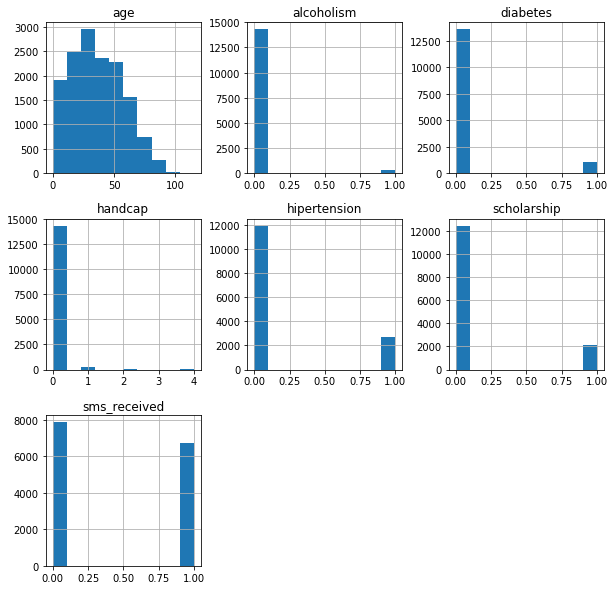

In [22]:
# generate a histogram from the dataframe with only female patients
df_nsf.hist(figsize=(10, 10));

For both bar charts below, we can see that the "Jardim Camburi" and the "Maria Ortiz" neighbourhood had more no-show records than any other.

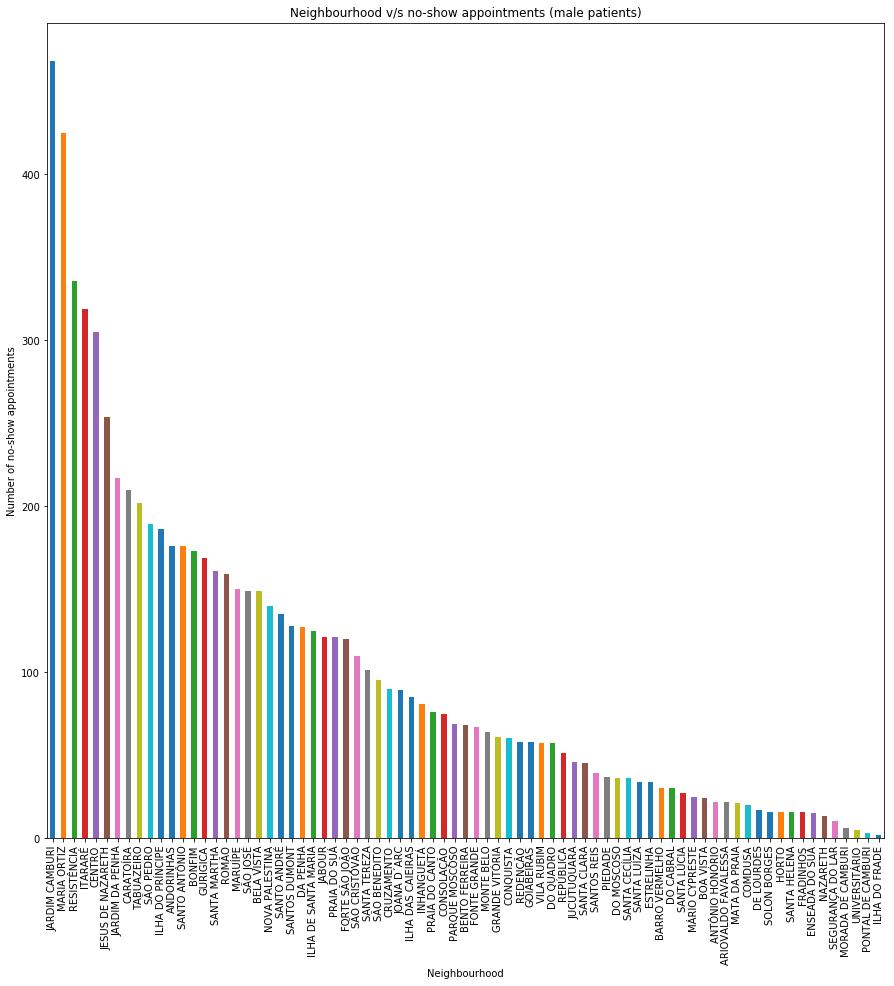

In [23]:
# plot a bar chart with the neighbourhoods which male patients didn't showed up their appointments
df_nsm['neighbourhood'].value_counts().plot(kind='bar', figsize=(15, 15));
# plotting the x label
plt.xlabel('Neighbourhood');
# plotting the y label
plt.ylabel('Number of no-show appointments');
# plotting the title
plt.title('Neighbourhood v/s no-show appointments (male patients)');

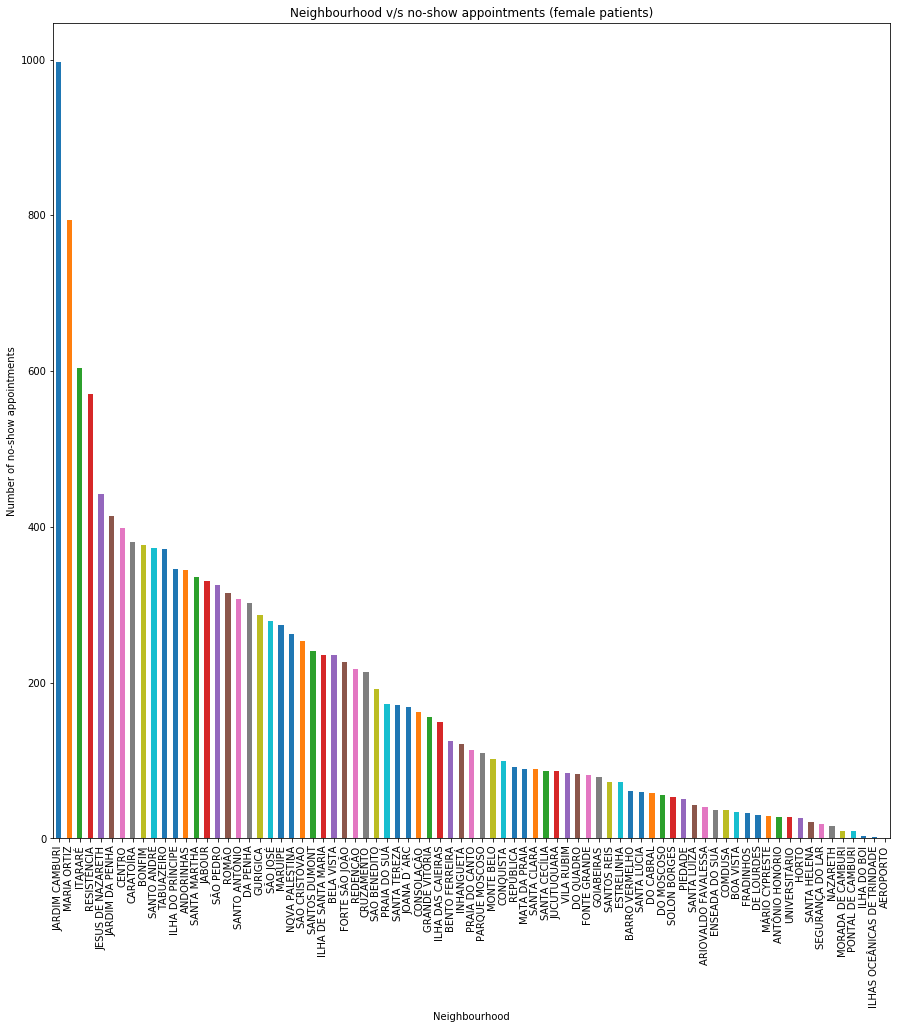

In [24]:
# plot a bar chart with the neighbourhoods which female patients didn't showed up their appointments
df_nsf['neighbourhood'].value_counts().plot(kind='bar', figsize=(15, 15));
# plotting the x label
plt.xlabel('Neighbourhood');
# plotting the y label
plt.ylabel('Number of no-show appointments');
# plotting the title
plt.title('Neighbourhood v/s no-show appointments (female patients)');

Next, by looking at both histograms for male and females by age we can see that:
    
* Most of the female patients that didn't showed up their appointments are around 20-40 years old
* Most of the male patients that didn't showed up their appointments are around 0-20 years old

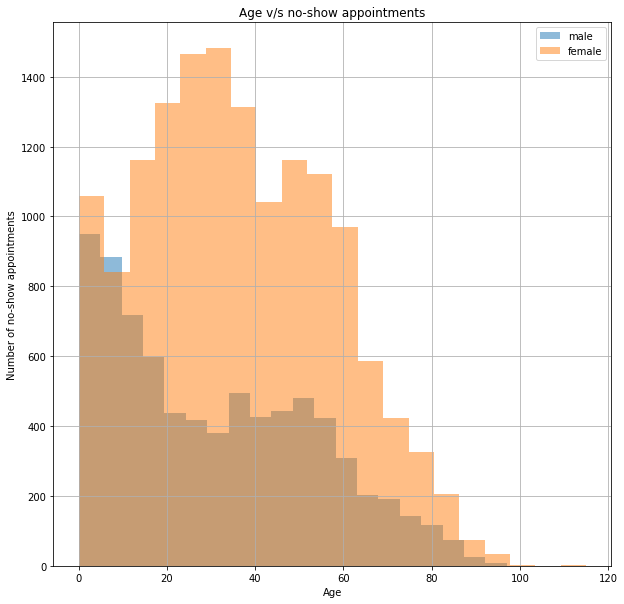

In [25]:
# plot the histogram for male patients
df_nsm.age.hist(figsize=(10,10), alpha=0.5, bins=20, label='male')
# plot the histogram for female patients
df_nsf.age.hist(figsize=(10,10), alpha=0.5, bins=20, label='female')
# plot the x label
plt.xlabel('Age');
# plot the y label
plt.ylabel('Number of no-show appointments');
# plot the title
plt.title('Age v/s no-show appointments');
# plot the legend
plt.legend();

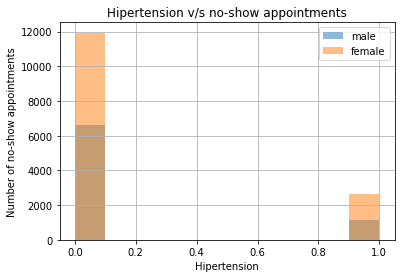

In [26]:
# plot the hipertension histogram for male patients
df_nsm.hipertension.hist(alpha=0.5, label='male')
# plot the hipertension histogram for female patients
df_nsf.hipertension.hist(alpha=0.5, label='female')
# plot the x label
plt.xlabel('Hipertension');
# plot the y label
plt.ylabel('Number of no-show appointments');
# plot the title
plt.title('Hipertension v/s no-show appointments');
# plot the legend
plt.legend();

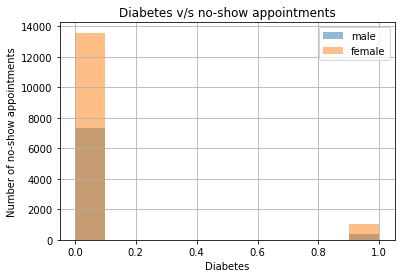

In [27]:
# plot the diabetes histogram for male patients
df_nsm.diabetes.hist(alpha=0.5, label='male')
# plot the diabetes histogram for male patients
df_nsf.diabetes.hist(alpha=0.5, label='female')
# plot the x label
plt.xlabel('Diabetes');
# plot the y label
plt.ylabel('Number of no-show appointments');
# plot the title
plt.title('Diabetes v/s no-show appointments');
# plot the legend
plt.legend();

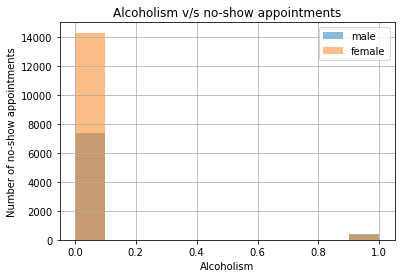

In [28]:
# plot the alcoholism histogram for male patients
df_nsm.alcoholism.hist(alpha=0.5, label='male')
# plot the alcoholism histogram for female patients
df_nsf.alcoholism.hist(alpha=0.5, label='female')
# plot the x label
plt.xlabel('Alcoholism');
# plot the y label
plt.ylabel('Number of no-show appointments');
# plot the title
plt.title('Alcoholism v/s no-show appointments');
# plot the legend
plt.legend();

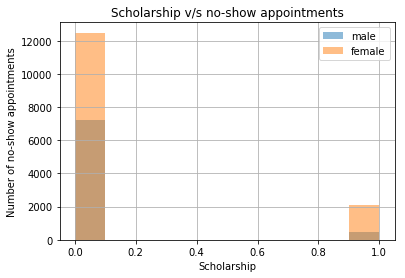

In [29]:
# plot the scholarship histogram for male patients
df_nsm.scholarship.hist(alpha=0.5, label='male')
# plot the scholarship histogram for female patients
df_nsf.scholarship.hist(alpha=0.5, label='female')
# plot the x label
plt.xlabel('Scholarship');
# plot the y label
plt.ylabel('Number of no-show appointments');
# plot the title
plt.title('Scholarship v/s no-show appointments');
# plot the legend
plt.legend();

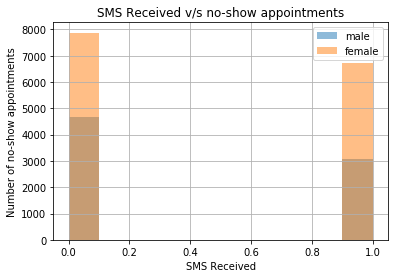

In [30]:
# plot the sms_received histogram for male patients
df_nsm.sms_received.hist(alpha=0.5, label='male')
# plot the sms_received histogram for female patients
df_nsf.sms_received.hist(alpha=0.5, label='female')
# plot the x label
plt.xlabel('SMS Received');
# plot the y label
plt.ylabel('Number of no-show appointments');
# plot the title
plt.title('SMS Received v/s no-show appointments');
# plot the legend
plt.legend();

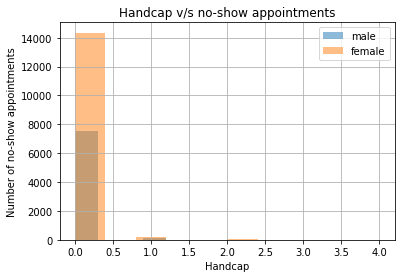

In [31]:
# plot the handcap histogram for male patients
df_nsm.handcap.hist(alpha=0.5, label='male')
# plot the handcap histogram for female patients
df_nsf.handcap.hist(alpha=0.5, label='female')
# plot the x label
plt.xlabel('Handcap');
# plot the y label
plt.ylabel('Number of no-show appointments');
# plot the title
plt.title('Handcap v/s no-show appointments');
# plot the legend
plt.legend();

Next, we will analyze all of the health conditions x the age of the patients. The blue histogram refers to patients who don't have the condition, and the orange one refers to those who have the health condition.

First, the hipertension. We can see, in both cases, that patients around 40-80 years old are more likely to miss their medical appointments.

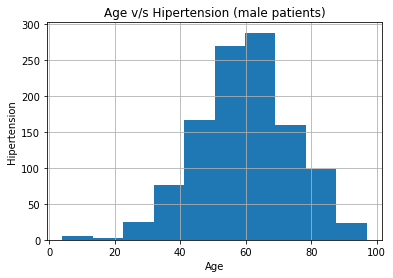

In [32]:
# plot a histogram only with male patients that have hipertension
df_nsm.query('hipertension == 1').age.hist()
# plot tht title
plt.title("Age v/s Hipertension (male patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Hipertension");

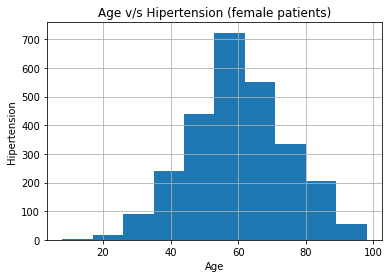

In [33]:
# plot a histogram only with female patients that have hipertension
df_nsf.query('hipertension == 1').age.hist()
# plot the title
plt.title("Age v/s Hipertension (female patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Hipertension");

Next, we will look at the diabetes condition. We can see, in both cases, that male patients around 60 years old are more likely to miss their medical appointments. And female patients around 55-65 years old are more likely to skip their appointments.

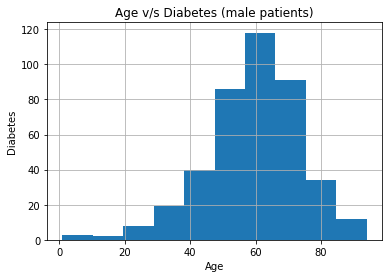

In [34]:
# plot a histogram only with male patients that have diabetes
df_nsm.query('diabetes == 1').age.hist()
# plot the title
plt.title("Age v/s Diabetes (male patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Diabetes");

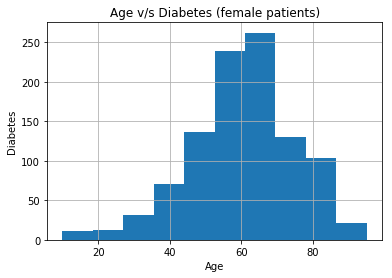

In [35]:
# plot a histogram only with female patients that have diabetes
df_nsf.query('diabetes == 1').age.hist()
# plot the title
plt.title("Age v/s Diabetes (female patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Diabetes");

Next, we will look at the alcoholism condition. We can see that male patients around 40-60 years old are more likely to miss their medical appointments. And female patients around 40 years old are more likely to skip their appointments.

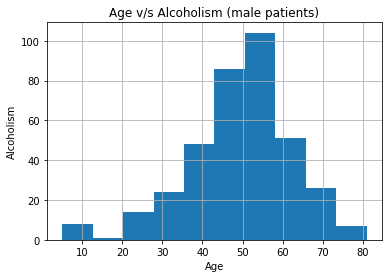

In [36]:
# plot a histogram only with male patients that are alcoholics
df_nsm.query('alcoholism == 1').age.hist()
# plot the title
plt.title("Age v/s Alcoholism (male patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Alcoholism");

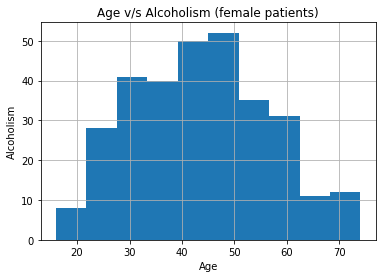

In [37]:
# plot a histogram only with female patients that are alcoholics
df_nsf.query('alcoholism == 1').age.hist()
# plot the title
plt.title("Age v/s Alcoholism (female patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Alcoholism");

Next, we will look at the patients who are enrolled in the "Bolsa Família" scholarship program. We can see that male patients around 0-20 years old are more likely to miss their medical appointments. And female patients around 30-40 years old are more likely to skip their appointments.

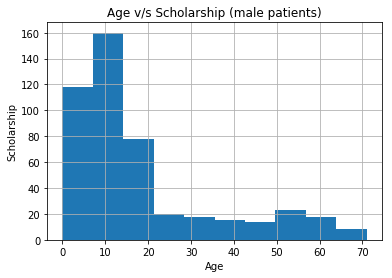

In [38]:
# plot a histogram only with male patients that are enrolled on the Bolsa Família scholarship
df_nsm.query('scholarship == 1').age.hist()
# plot the title
plt.title("Age v/s Scholarship (male patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Scholarship");

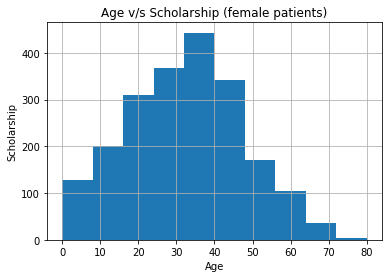

In [39]:
# plot a histogram only with female patients that are enrolled on the Bolsa Família scholarship
df_nsf.query('scholarship == 1').age.hist()
# plot the title
plt.title("Age v/s Scholarship (female patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Scholarship");

Next, we'll look at patients who have some sort of handcap. By looking at the graph, few patients who have some sort of handcap didn't showed up their appointments, which makes this variable irrelevant.

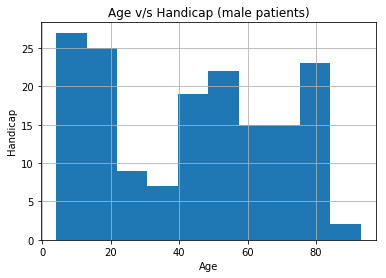

In [40]:
# plot a histogram only with male patients that have some sort of handcap
df_nsm.query('handcap > 0').age.hist()
# plot the title
plt.title("Age v/s Handicap (male patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Handicap");

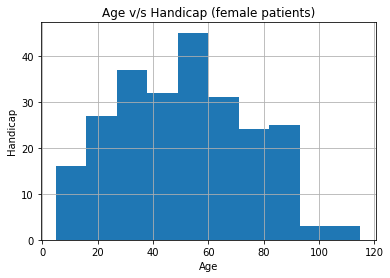

In [41]:
# plot a histogram only with female patients that have some sort of handcap
df_nsf.query('handcap > 0').age.hist()
# plot the title
plt.title("Age v/s Handicap (female patients)");
# plot the x label
plt.xlabel("Age");
# plot the y label
plt.ylabel("Handicap");

<a id='conclusions'></a>
## Conclusions

To conclude our analysis, we can enumerate some factors that allow us to predict if a patient will or won't show up their appointment.

* Women are more likely to miss their medical appointments;
* Male patients around 0-20 years old and women around 20-40 years old are more likely to miss their medical appointments;
* Female patients around 50-60 years old who suffer from hipertension are more likely to miss their medical appointments;
* The 'Jardim Camburi' and 'Maria Ortiz' neighbourhoods registered a large number of patients who missed their appointments;
* Female patients who are enrolled on the 'Bolsa Família' scholarship program are more likely to miss their medical appointments;

### Limitations

* The education level of each patient could be an interesting variable to look at;
* The number of neighbourhoods (approximately 60) is too limited, which isn't a representative sample of the Brazilian population;
* Additional details could be given such as the transport to the clinic, per example;